<a href="https://colab.research.google.com/github/sayali1004/ML_projects/blob/main/Heart_Disease_Mortality_US_2019_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Analyzing Heart Disease Mortality Data Among US Adults (35+) by State

### Year : 2019-2021

### Overall Picture:
Perform comprehensive analysis of heart mortality rates in United States between 2019 to 2021, understanding range of rates between different states, counties and ethnic groups.

### Goal:
Determine which ethnic groups, counties, and genders require more focus regarding heart disease mortality in U.S. adults aged 35+.

### Who would benefit:

1. Public Health Agencies
2. Healthcare Providers and Hospital Systems
3. Policy Makers and Government Officials
4. Health Insurance Companies
5. Academic and Clinical Researchers

### Methodology
1. Data Cleaning & Preprocessing: <br>
Removed or flagged entries with Data_Value_Footnote_Symbol indicating unreliable or missing data (e.g., "~" or NaN).
Filtered for rows where GeographicLevel = County to enable local-level focus.
2. Analysis Techniques: <br>
Grouped data by Gender, Ethnicity, and County.
Computed averages and percentiles of heart disease mortality rates across subgroups.
3. Visualizations:<br>
Used visualizations like heat maps or bar plots to highlight disparities.

### Results
1. By Ethnicity <br>
Data shows Black Male has maximum heart mortality rate-

| Year | Location          | State | Ethnicity | Gender | Mortality Rate (per 100,000) |
| ---- | ----------------- | ----- | --------- | ------ | ---------------------------- |
|**2020** | **Martinsville City** | **VA**   | **Black**     | **Male**  | **3203.9**                    |
| 2020 | Clinch County     | GA    | Black     | Male   | 1813.6                       |
| 2020 | Poinsett County   | AR    | Black     | Male   | 1648.6                       |
| 2020 | Putnam County     | IN    | Black     | Male   | 1506.6                       |
| 2020 | Washington County | AR    | Black     | Male   | 1481.2                       |


2. By Gender <br>
Seems like males are having more avg heart mortality rates than females
**MALE:441.04** <br>
**FEMALE:373.3**


3. By County<br>
From the analysis it is seen that Virgin Islands- VI is having the lowest heart mortality rate ~ 184 wherease Guam - GU which is a territory not a state is experiencing high mortality rate- 578 which needs to be adressed.
<br>**By state- Highest mortality is in VA-Virginia : 3203.9**
<br>**Lowest Mortality is in Florida : 0.0**

4. By Region <br>
Divided regions in east west north and south by using latitudes as reference.

| Region    | Average Mortality Rate (per 100,000) |
| --------- | ------------------------------------ |
| **South** | **420.89**                           |
| East      | 335.94                               |
| North     | 325.14                               |
| West      | 309.81                               |






### Description about the variables :
1. Year : Year in which the data is recorded
2. Location Abbr : State abbrieviation
3. LocationDesc: More detailed location
4. GeographicLevel : Is it a county/nation/city
5. Data_value : Metric of how many people died in that area, eg - 230 people out of every 100,000 died of heart disease .
6. Data_Value_Footnote_Symbol : tells us that, the Data_value is missing because the data was to low to be reported (nan or ~)
7. Data_Value_Footnote: Explanation if a footnote is present (usually NA).
8. Gender
9. Ethnicity


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely import wkt

import geopandas as gpd
from shapely.geometry import Point
!pip install contextily
import contextily as ctx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 78.0 MB/s eta 0:00:00


In [2]:
df=pd.read_csv('/content/Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2019-2021.csv')

In [3]:
df.shape

(78792, 21)

In [4]:
df.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource',
       'Class', 'Topic', 'Data_Value', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'TopicID', 'LocationID', 'Y_lat', 'X_lon',
       'Georeference'],
      dtype='object')

In [5]:
df.isnull().sum()

,0
Year,0
LocationAbbr,0
LocationDesc,0
GeographicLevel,0
DataSource,0
Class,0
Topic,0
Data_Value,44362
Data_Value_Unit,0
Data_Value_Type,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78792 entries, 0 to 78791
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        78792 non-null  int64  
 1   LocationAbbr                78792 non-null  object 
 2   LocationDesc                78792 non-null  object 
 3   GeographicLevel             78792 non-null  object 
 4   DataSource                  78792 non-null  object 
 5   Class                       78792 non-null  object 
 6   Topic                       78792 non-null  object 
 7   Data_Value                  34430 non-null  float64
 8   Data_Value_Unit             78792 non-null  object 
 9   Data_Value_Type             78792 non-null  object 
 10  Data_Value_Footnote_Symbol  44362 non-null  object 
 11  Data_Value_Footnote         44362 non-null  object 
 12  StratificationCategory1     78792 non-null  object 
 13  Stratification1             787

In [7]:
# stratificationcategory1, stratificationcategory2, TopicID,
#Topic, Data_Value_Unit, Class, DataSource does not have any unique value must be dropped

df=df.drop(['StratificationCategory1','StratificationCategory2','TopicID',
            'Topic','Data_Value_Unit','Class','DataSource'],axis=1)

In [8]:
df.shape

(78792, 14)

In [9]:
df.isnull().sum()

,0
Year,0
LocationAbbr,0
LocationDesc,0
GeographicLevel,0
Data_Value,44362
Data_Value_Type,0
Data_Value_Footnote_Symbol,34430
Data_Value_Footnote,34430
Stratification1,0
Stratification2,0


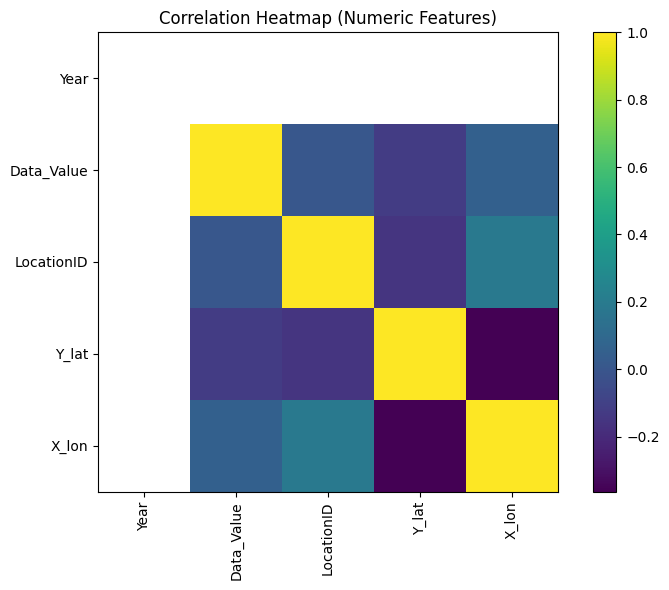

In [10]:
numeric_df = df.select_dtypes(include=np.number)
matrix = numeric_df.corr()
matrix

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
plt.imshow(matrix, interpolation='nearest')
plt.title("Correlation Heatmap (Numeric Features)")
plt.colorbar()
plt.xticks(range(len(matrix.columns)), matrix.columns, rotation=90)
plt.yticks(range(len(matrix.columns)), matrix.columns)
plt.tight_layout()
plt.show()



In [11]:
#Rename columns
df=df.rename(columns={'Stratification1':'Gender', 'Stratification2':'Ethnicity'})

In [12]:
df.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,Data_Value,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,Gender,Ethnicity,LocationID,Y_lat,X_lon,Georeference
0,2020,AK,Denali,County,348.8,"Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Male,White,2068,63.678820,-149.960801,POINT (-149.9608012 63.67881971)
1,2020,CA,California,State,230.1,"Age-adjusted, 3-year Average Rate",NaN,NaN,Male,More than one race,6,37.241400,-119.601000,POINT (-119.601 37.2414)
2,2020,CO,Park County,County,135.9,"Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Female,White,8093,39.115616,-105.708698,POINT (-105.7086982 39.11561621)
3,2020,FL,Walton County,County,126.5,"Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Female,Asian,12131,30.655966,-86.157457,POINT (-86.15745736 30.65596581)
4,2020,GA,Whitfield County,County,155.1,"Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Female,Hispanic,13313,34.803854,-84.962112,POINT (-84.96211184 34.80385386)


In [13]:
df.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'Data_Value',
       'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Gender', 'Ethnicity', 'LocationID', 'Y_lat', 'X_lon', 'Georeference'],
      dtype='object')

In [14]:
# Grouping by Location Desc
grp_gender_eth = df.groupby(['Gender','Ethnicity']).agg({'Data_Value': 'sum'})
grp_gender_eth

Data_Value
Gender  Ethnicity                                            
Female  American Indian or Alaska Native              97407.5
        Asian                                         87465.5
        Black                                        615566.2
        Hispanic                                     190889.6
        More than one race                            49737.2
        Native Hawaiian or Other Pacific Islander     19509.9
        Overall                                      921591.5
        White                                        915677.4
Male    American Indian or Alaska Native             241797.3
        Asian                                        147773.5
        Black                                       1081524.0
        Hispanic                                     353356.4
        More than one race                            89720.3
        Native Hawaiian or Other Pacific Islander     38631.5
        Overall                                     1505168.8
        White                                       1498493.1
Overall American Indian or Alaska Native             257502.7
        Asian                                        169841.4
        Black                                        962754.2
        Hispanic                                     340548.7
        More than one race                            98362.9
        Native Hawaiian or Other Pacific Islander     43473.3
        Overall                                     1191934.9
        White                                       1187354.2

In [15]:
df['Data_Value'].describe()
df.groupby('Year')['Data_Value'].mean()

,Data_Value
Year,
2020,351.614348


In [16]:
#Grouping by Gender and Data_Value

grp_location = df.groupby(['Gender', 'LocationDesc'])['Data_Value'].mean().reset_index()
grp_location

,Gender,LocationDesc,Data_Value
0,Female,Abbeville County,226.400000
1,Female,Acadia Parish,405.400000
2,Female,Accomack County,361.633333
3,Female,Ada County,136.440000
4,Female,Adair County,327.872727
...,...,...,...
6061,Overall,Yukon-Koyukuk,259.650000
6062,Overall,Yuma County,302.140000
6063,Overall,Zapata County,261.333333
6064,Overall,Zavala County,404.633333


In [17]:
# segreagting regions by east, west, north, and, south
def classify_region_simple(row):
    lat = row['Y_lat']
    lon = row['X_lon']

    if lon <= -100:
        return 'West'
    elif lon >= -85:
        return 'East'
    elif lat >= 39:
        return 'North'
    else:
        return 'South'

# Adding a new column Region
df['Region'] = df.apply(classify_region_simple, axis=1)
df.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'Data_Value',
       'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Gender', 'Ethnicity', 'LocationID', 'Y_lat', 'X_lon', 'Georeference',
       'Region'],
      dtype='object')

In [18]:
df.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,Data_Value,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,Gender,Ethnicity,LocationID,Y_lat,X_lon,Georeference,Region
0,2020,AK,Denali,County,348.8,"Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Male,White,2068,63.678820,-149.960801,POINT (-149.9608012 63.67881971),West
1,2020,CA,California,State,230.1,"Age-adjusted, 3-year Average Rate",NaN,NaN,Male,More than one race,6,37.241400,-119.601000,POINT (-119.601 37.2414),West
2,2020,CO,Park County,County,135.9,"Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Female,White,8093,39.115616,-105.708698,POINT (-105.7086982 39.11561621),West
3,2020,FL,Walton County,County,126.5,"Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Female,Asian,12131,30.655966,-86.157457,POINT (-86.15745736 30.65596581),South
4,2020,GA,Whitfield County,County,155.1,"Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Female,Hispanic,13313,34.803854,-84.962112,POINT (-84.96211184 34.80385386),East


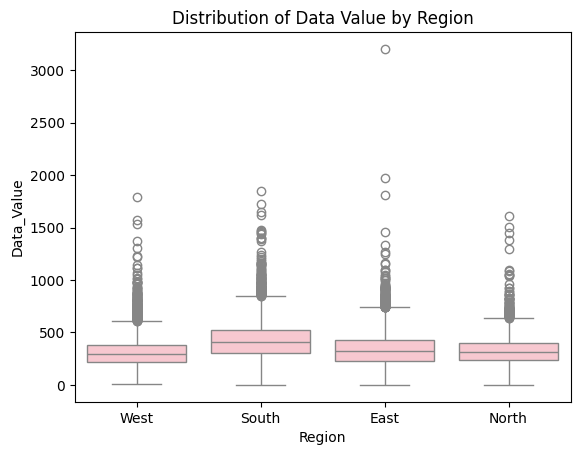

In [19]:
sns.boxplot(x='Region', y='Data_Value',color='pink', data=df)
plt.title('Distribution of Data Value by Region')
plt.show()

In [20]:
# Compute mean mortality rate by region
region_avg = df.groupby('Region')['Data_Value'].mean().reset_index()
region_avg

,Region,Data_Value
0,East,335.939970
1,North,325.139405
2,South,420.890240
3,West,309.814653


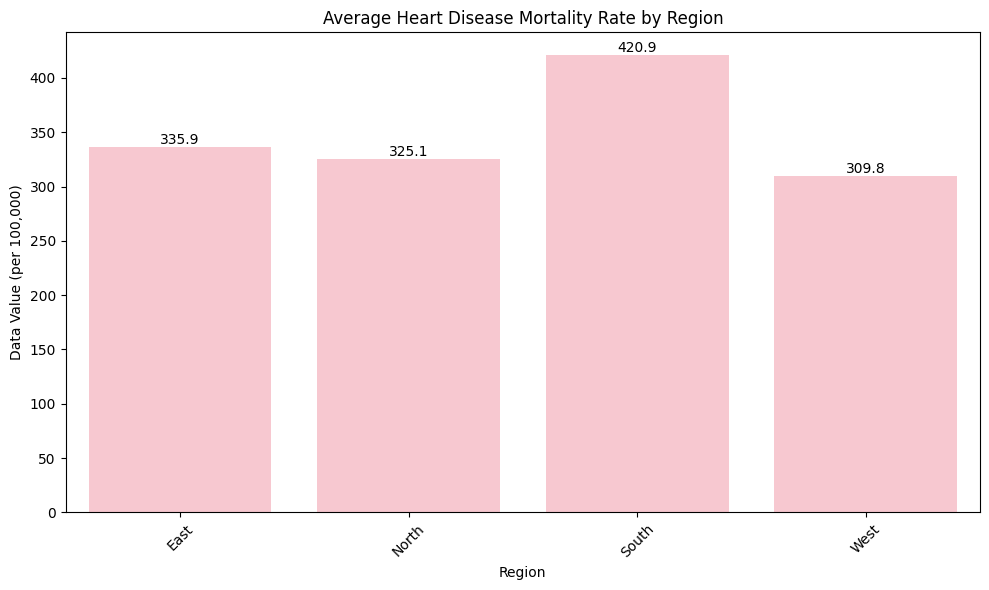

In [21]:
# Bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Region', y='Data_Value', color='pink', data=region_avg)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{height:.1f}',
        ha='center',
        va='bottom',
        fontsize=10
    )


plt.title('Average Heart Disease Mortality Rate by Region')
plt.ylabel('Data Value (per 100,000)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#from thr average heart disease mortality rate it is can be observed that southern region of united states is having
#maximum deaths due cardiovasular attacks

In [22]:
# compute mortality rate by ethnicity
ethnicity_avg = df.groupby('Ethnicity')['Data_Value'].mean().reset_index()
ethnicity_avg

,Ethnicity,Data_Value
0,American Indian or Alaska Native,397.275300
1,Asian,170.992149
2,Black,472.609168
3,Hispanic,211.168186
4,More than one race,206.980331
5,Native Hawaiian or Other Pacific Islander,443.732314
6,Overall,368.427530
7,White,377.478744


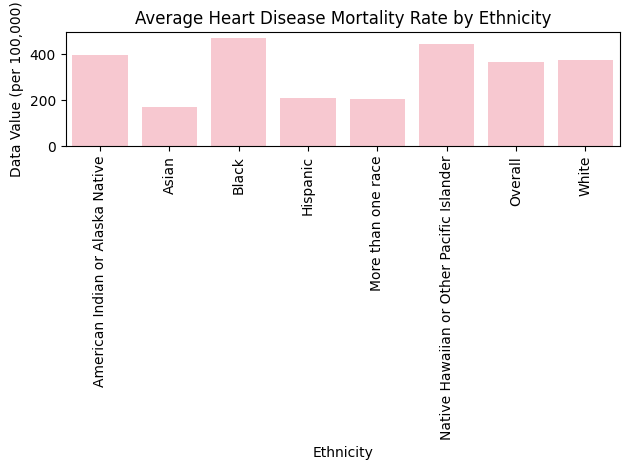

In [23]:
# plot ethnicity vs data_value
sns.barplot(x='Ethnicity',y='Data_Value',color='pink',data=ethnicity_avg)
plt.title('Average Heart Disease Mortality Rate by Ethnicity')
plt.ylabel('Data Value (per 100,000)')
plt.xlabel('Ethnicity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Native Hawaiian or Other Pacific Islander having the maximum heart mortality rate
# Asians having the lowest heart mortality rate


In [24]:
# ethnicity by region and gender
ethnicity_region = df.groupby(['Ethnicity','Region'])['Data_Value'].max().reset_index()
print("Ethnicity by Heart mortality rate",ethnicity_region)
print("\n Maximum Heart mortality rate experienced by an ethnicity:",ethnicity_region['Data_Value'].max())



Ethnicity by Heart mortality rate                                     Ethnicity Region  Data_Value
0            American Indian or Alaska Native   East      1244.1
1            American Indian or Alaska Native  North      1612.1
2            American Indian or Alaska Native  South      1721.1
3            American Indian or Alaska Native   West      1790.9
4                                       Asian   East       611.1
5                                       Asian  North       677.0
6                                       Asian  South       609.0
7                                       Asian   West       931.6
8                                       Black   East      3203.9
9                                       Black  North      1506.6
10                                      Black  South      1648.6
11                                      Black   West      1308.2
12                                   Hispanic   East      1150.3
13                                   Hispanic  North    

In [25]:
# checking Black Male- 3203.661090, in which state and county?

subset = df[(df['Ethnicity'] == 'Black') & (df['Gender'] == 'Male')]
highest_rows = subset.sort_values(by='Data_Value', ascending=False)
print(highest_rows[['Year', 'LocationDesc', 'LocationAbbr', 'Ethnicity','Data_Value']].head())


       Year       LocationDesc LocationAbbr Ethnicity  Data_Value
73680  2020  Martinsville City           VA     Black      3203.9
6893   2020      Clinch County           GA     Black      1813.6
6947   2020    Poinsett County           AR     Black      1648.6
26138  2020      Putnam County           IN     Black      1506.6
12706  2020  Washington County           AR     Black      1481.2


In [26]:
# interactive lineplot by ethnicity, region and data_value
import plotly.express as px
fig=px.line(
    ethnicity_region,
    x='Ethnicity',
    y='Data_Value',
    color='Region',
    title='Average Heart Disease Mortality Rate by Ethnicity and Region',
    labels={'Ethnicity': 'Ethnicity', 'Data_Value':'Data Value (per 100,000)'},
    markers=True
)

fig.update_layout(xaxis_tickangle=30)
fig.show()

## insights from the plot:
'''Black ethnicity from southern region is facing maximum cardivasular deaths  followed by southern Native Hawaiians
whereas Asians having the lowest heart disease mortality rate, from eastern region, followed by northern Hispanic ethnics'''

'Black ethnicity from southern region is facing maximum cardivasular deaths  followed by southern Native Hawaiians\nwhereas Asians having the lowest heart disease mortality rate, from eastern region, followed by northern Hispanic ethnics'

In [27]:
#male vs female data_value rates
gender_avg = df.groupby('Gender')['Data_Value'].mean().reset_index()
gender_avg

#plot
fig1=px.bar(
    gender_avg,
    x='Gender',
    y='Data_Value',
    color='Gender',
    title='Average Heart Disease Mortality Rate by Gender',
    labels={'Gender': 'Gender', 'Data_Value':'Data Value (per 100,000)'},

)

fig1.update_layout(xaxis_tickangle=30)
fig1.show()

#insights from the graph
''' Male are having higher heart disease mortality rate than female'''

' Male are having higher heart disease mortality rate than female'

In [28]:
import plotly.express as px

# Insert your Mapbox token here
px.set_mapbox_access_token("YOUR_MAPBOX_ACCESS_TOKEN")

fig = px.scatter_mapbox(
    df,
    lat="Y_lat",
    lon="X_lon",
    color="LocationAbbr",
    hover_name="LocationAbbr",
    zoom=4,
    height=600,
    title="Location Markers on a Google Maps–like Map",
)

# Choose map style close to Google Maps
fig.update_layout(mapbox_style="streets")  # Options: 'streets', 'outdoors', 'light', 'dark', 'satellite', 'satellite-streets'

fig.show()


In [29]:
# maximum and minimum group by location description and data value
max_data_value=df['Data_Value'].max()
print("Maximum mortality rate:", max_data_value)
min_data_value=df['Data_Value'].min()
print("Minimum mortality rate:", min_data_value)
avg_data_value=df['Data_Value'].mean()
print("Average mortality rate:", avg_data_value)


Maximum mortality rate: 3203.9
Minimum mortality rate: 0.0
Average mortality rate: 351.6143479523671


In [30]:
# Values associated with maximum and minimum data_value/heart_mortality_rates
max_row = df.loc[df['Data_Value'].idxmax()]
print("County having maximum heart mortality rate:", max_row['LocationDesc'])
print("State:",max_row['LocationAbbr'])
print("Data_Value/Heart mortality:", max_row['Data_Value'])
print("-"*80)

min_row = df.loc[df['Data_Value'].idxmin()]
print("County having minimum heart mortality rate:", min_row['LocationDesc'])
print("State:",min_row['LocationAbbr'])
print("Data_Value/Heart mortality:", min_row['Data_Value'])

County having maximum heart mortality rate: Martinsville City
State: VA
Data_Value/Heart mortality: 3203.9
--------------------------------------------------------------------------------
County having minimum heart mortality rate: Leon County
State: FL
Data_Value/Heart mortality: 0.0


In [31]:
# Plot by average heart disease mortality rate by state (A-Z)
import plotly.express as px

# Reset index to make it a proper DataFrame
avg_state_data_value = df.groupby('LocationAbbr')['Data_Value'].mean().sort_index().reset_index()

fig = px.line(
    avg_state_data_value,
    x='LocationAbbr',
    y='Data_Value',
    markers=True,
    title='Average Heart Disease Mortality Rate by State (A-Z)',
    labels={'LocationAbbr': 'State', 'Data_Value': 'Heart Mortality Rate'}
)

fig.update_layout(xaxis_tickangle=-90)
fig.show()



In [32]:
# Why AS? lets see
df[df['LocationAbbr']=='AS']

# because we dont have sufficient data for AS, we need to drop AS from the column
df=df[df['LocationAbbr']!='AS']

In [33]:
# now it is more clear that VI is having the lowest heart_mortality_average
df[df['LocationAbbr']=='VI']
non_null_data_value=df[df['Data_Value']!=np.nan]
non_null_data_value

,Year,LocationAbbr,LocationDesc,GeographicLevel,Data_Value,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,Gender,Ethnicity,LocationID,Y_lat,X_lon,Georeference,Region
0,2020,AK,Denali,County,348.8,"Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Male,White,2068,63.678820,-149.960801,POINT (-149.9608012 63.67881971),West
1,2020,CA,California,State,230.1,"Age-adjusted, 3-year Average Rate",NaN,NaN,Male,More than one race,6,37.241400,-119.601000,POINT (-119.601 37.2414),West
2,2020,CO,Park County,County,135.9,"Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Female,White,8093,39.115616,-105.708698,POINT (-105.7086982 39.11561621),West
3,2020,FL,Walton County,County,126.5,"Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Female,Asian,12131,30.655966,-86.157457,POINT (-86.15745736 30.65596581),South
4,2020,GA,Whitfield County,County,155.1,"Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Female,Hispanic,13313,34.803854,-84.962112,POINT (-84.96211184 34.80385386),East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78787,2020,TX,Eastland County,County,NaN,"Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Overall,Native Hawaiian or Other Pacific Islander,48133,32.332826,-98.830318,POINT (-98.83031837 32.33282585),South
78788,2020,WA,San Juan County,County,307.7,"Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Male,Asian,53055,48.535986,-123.082448,POINT (-123.0824477 48.53598644),West
78789,2020,WA,Pierce County,County,297.2,"Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Female,American Indian or Alaska Native,53053,47.016724,-122.091967,POINT (-122.0919668 47.01672374),West
78790,2020,UT,Carbon County,County,454.7,"Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Male,Hispanic,49007,39.641056,-110.580615,POINT (-110.580615 39.641056),West


In [34]:
#now lets see what changed
# Plot by average heart disease mortality rate by state (A-Z)
import plotly.express as px

# Reset index to make it a proper DataFrame
avg_state_data_value = non_null_data_value.groupby('LocationAbbr')['Data_Value'].mean().sort_index().reset_index()

fig = px.line(
    avg_state_data_value,
    x='LocationAbbr',
    y='Data_Value',
    markers=True,
    title='Average Heart Disease Mortality Rate by State (A-Z)',
    labels={'LocationAbbr': 'State', 'Data_Value': 'Heart Mortality Rate'}
)

fig.update_layout(xaxis_tickangle=-90)
fig.show()

In [35]:
# grouping state average data by ethnicity
ethnicity_state = non_null_data_value.groupby(['LocationAbbr', 'Ethnicity'])['Data_Value'].mean().reset_index()
ethnicity_state

# plot scatter graph
fig = px.scatter(
    ethnicity_state,
    x='LocationAbbr',
    y='Data_Value',
    color='Ethnicity',
    title='Average Heart Disease Mortality Rate by State and Ethnicity',
    labels={'LocationAbbr': 'State', 'Data_Value': 'Heart Mortality Rate'}
)

fig.update_layout(xaxis_tickangle=-90)
fig.show()